<a href="https://colab.research.google.com/github/AmeyHengle/Arabic-Sentiment-Identification/blob/main/EDA/ArSarcasm_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = pd.read_csv('/content/ArSarcasm_train.csv')

In [ ]:
sentiment_data = train_dataset['sentiment']
sarcasm_data = train_dataset['sarcasm']
dialect_data = train_dataset['dialect']

sentiment_types = sentiment_data.unique()
sarcasm_types = sarcasm_data.unique()
dialect_types = dialect_data.unique()

In [ ]:
print(sarcasm_types)
print(sentiment_types)
print(dialect_types)

[False  True]
['negative' 'neutral' 'positive']
['gulf' 'msa' 'egypt' 'levant' 'magreb']


In [ ]:
sarcasm_data

0       False
1       False
2       False
3        True
4       False
        ...  
8432    False
8433    False
8434     True
8435     True
8436    False
Name: sarcasm, Length: 8437, dtype: bool

In [ ]:
dialect_data.head(20)

0       gulf
1        msa
2      egypt
3     levant
4        msa
5      egypt
6        msa
7      egypt
8        msa
9        msa
10     egypt
11      gulf
12     egypt
13     egypt
14       msa
15    levant
16       msa
17       msa
18    levant
19      gulf
Name: dialect, dtype: object

# Sarcasm Relation with dialect


In [ ]:
def get_dialect_wise_sarcasm_count(dialect_name):
  q = f'dialect=="{dialect_name}"'
  df = train_dataset.query(q)['sarcasm']
  v = df.value_counts()
  true_count = v[True]
  false_count = v[False]
  return true_count, false_count

In [ ]:
gulf_true, gulf_false = get_dialect_wise_sarcasm_count('gulf')
msa_true, msa_false = get_dialect_wise_sarcasm_count('msa')
egypt_true, egypt_false = get_dialect_wise_sarcasm_count('egypt')
levant_true, levant_false = get_dialect_wise_sarcasm_count('levant')
magreb_true, magreb_false = get_dialect_wise_sarcasm_count('magreb')

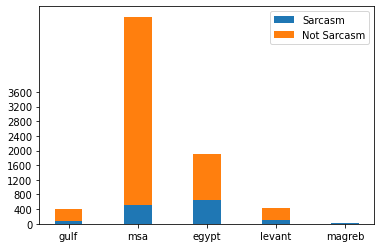

In [ ]:
#Bar Plot
N = len(dialect_types)
true_values = (gulf_true, msa_true, egypt_true, levant_true, magreb_true)
false_values = (gulf_false, msa_false, egypt_false, levant_false, magreb_false)
ind = np.arange(N)
p1 = plt.bar(ind, true_values, width=0.4)
p2 = plt.bar(ind, false_values, width=0.4, bottom=true_values)
plt.xticks(ind, dialect_types)
plt.yticks(np.arange(0, 4000, 400))
plt.legend((p1[0], p2[0]), ('Sarcasm', 'Not Sarcasm'))
plt.show()

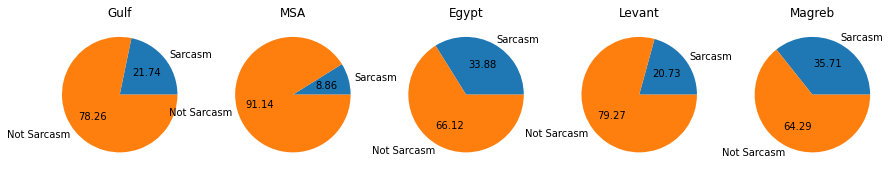

In [ ]:
#Pie Plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,15))
ax1.pie([gulf_true, gulf_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
ax1.set_title('Gulf')
ax2.pie([msa_true, msa_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
ax2.set_title('MSA')
ax3.pie([egypt_true, egypt_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
ax3.set_title('Egypt')
ax4.pie([levant_true, levant_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
ax4.set_title('Levant')
ax5.pie([magreb_true, magreb_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
ax5.set_title('Magreb')
fig.show()

# Sentiment Relation With Sarcasm

In [ ]:
def get_sentiment_wise_sarcasm_count(sen):
    q = f'sentiment=="{sen}"'
    df = train_dataset.query(q)['sarcasm']
    v = df.value_counts()
    true_count = v[True]
    false_count = v[False]
    return true_count, false_count

In [ ]:
positive_true, positive_false = get_sentiment_wise_sarcasm_count('positive')
negative_true, negative_false = get_sentiment_wise_sarcasm_count('negative')
neutral_true, neutral_false = get_sentiment_wise_sarcasm_count('neutral')
print(negative_true, negative_false)

1181 1632


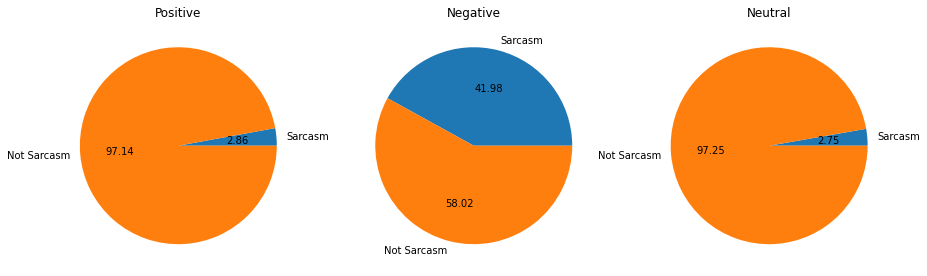

In [ ]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(15,15))
a1.pie([positive_true, positive_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
a1.set_title('Positive')
a2.pie([negative_true, negative_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
a2.set_title('Negative')
a3.pie([neutral_true, neutral_false], labels=['Sarcasm', 'Not Sarcasm'], autopct='%.2f')
a3.set_title('Neutral')
fig.show()

# Dialect relation with Sentiment

In [ ]:
def get_dialect_wise_sentiment_count(dialect_name):
  q = f'dialect=="{dialect_name}"'
  df = train_dataset.query(q)['sentiment']
  v = df.value_counts()
  neutral_count = v['neutral']
  pos_count = v['positive']
  neg_count = v['negative']
  return pos_count, neg_count, neutral_count

In [ ]:
gulf_pos, gulf_neg, gulf_neutral = get_dialect_wise_sentiment_count('gulf')
msa_pos, msa_neg, msa_neutral = get_dialect_wise_sentiment_count('msa')
egypt_pos, egypt_neg, egypt_neutral = get_dialect_wise_sentiment_count('egypt')
levant_pos, levant_neg, levant_neutral = get_dialect_wise_sentiment_count('levant')
magreb_pos, magreb_neg, magreb_neutral = get_dialect_wise_sentiment_count('magreb')

Text(0.5, 1.0, 'Magreb')

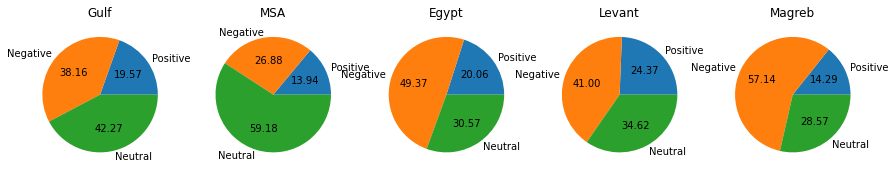

In [ ]:
fig, (a1,a2,a3,a4,a5) = plt.subplots(1,5, figsize=(15,15))
a1.pie([gulf_pos, gulf_neg, gulf_neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%.2f')
a1.set_title('Gulf')
a2.pie([msa_pos, msa_neg, msa_neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%.2f')
a2.set_title('MSA')
a3.pie([egypt_pos, egypt_neg, egypt_neutral],labels=['Positive', 'Negative', 'Neutral'], autopct='%.2f')
a3.set_title('Egypt')
a4.pie([levant_pos, levant_neg, levant_neutral],labels=['Positive', 'Negative', 'Neutral'], autopct='%.2f')
a4.set_title('Levant')
a5.pie([magreb_pos, magreb_neg, magreb_neutral],labels=['Positive', 'Negative', 'Neutral'], autopct='%.2f')
a5.set_title('Magreb')